# Visualize E-GEOD-33245 patterns
This notebook will examine patterns of generic and experiment-specific genes using E-GEOD-33245 as the template experiment

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load data
# Summary data using abs value of test statistic
grp_1v2_file = "generic_gene_summary_E-GEOD-33245_1v2.tsv"
grp_1v3_file = "generic_gene_summary_E-GEOD-33245_1v3.tsv"
grp_1v4_file = "generic_gene_summary_E-GEOD-33245_1v4.tsv"
grp_1v5_file = "generic_gene_summary_E-GEOD-33245_1v5.tsv"

# Summary data using raw value of test statistic to get directionality
grp_1v2_raw_file = "generic_gene_summary_E-GEOD-33245_1v2_raw.tsv"
grp_1v3_raw_file = "generic_gene_summary_E-GEOD-33245_1v3_raw.tsv"
grp_1v4_raw_file = "generic_gene_summary_E-GEOD-33245_1v4_raw.tsv"
grp_1v5_raw_file = "generic_gene_summary_E-GEOD-33245_1v5_raw.tsv"

## Create dataframe to compare trends
We are going to merge data across different conditions. For example, we will merge `grp_1v2` and `grp_1v3` to use for plotting later in this notebook. Deb can look at these tables to find *things of interest* as we start looking into how to use our computational predictions of generic and specific genes. 

She would like a dataframe with 1v2 and 1v3, 1v3 and 1v4.

In [3]:
# Read data
grp_1v2 = pd.read_csv(grp_1v2_file, sep="\t", header=0, index_col=0)
grp_1v3 = pd.read_csv(grp_1v3_file, sep="\t", header=0, index_col=0)
grp_1v4 = pd.read_csv(grp_1v4_file, sep="\t", header=0, index_col=0)
grp_1v5 = pd.read_csv(grp_1v5_file, sep="\t", header=0, index_col=0)

grp_1v2_raw = pd.read_csv(grp_1v2_raw_file, sep="\t", header=0, index_col=0)
grp_1v3_raw = pd.read_csv(grp_1v3_raw_file, sep="\t", header=0, index_col=0)
grp_1v4_raw = pd.read_csv(grp_1v4_raw_file, sep="\t", header=0, index_col=0)
grp_1v5_raw = pd.read_csv(grp_1v5_raw_file, sep="\t", header=0, index_col=0)

In [ ]:
# FUNCTIONS
process.merge_one_condition()
process.merge_two_conditions_df(grp_1v2, grp_1v3, assoc dfs) --> returns merged df
process.plot_two_conditions(merged_df, grp_1v2, grp_1v3, xlabel, ylabel) --> returns plot
process.get_and save_DE_gene_lists(merged_one_condition) --> returns dict of lists
process.plot_volcanos(gene_lists, merged_one_conditions)
process.plot_venn(gene_lists,grp_1v2)

In [4]:
# Merge 1v2 and 1v3 summaries
merged_1v2s_df = grp_1v2.merge(grp_1v2_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v2", "_grp_1v2_raw"])
merged_1v3s_df = grp_1v3.merge(grp_1v3_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v3", "_grp_1v3_raw"])
merged_1v2_1v3_all_df = merged_1v2s_df.merge(merged_1v3s_df, left_on='Gene ID', right_on="Gene ID")
merged_1v2_1v3_all_df.head()

,Gene ID,Adj P-value (Real)_grp_1v2,Rank (Real)_grp_1v2,Test statistic (Real)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Rank (simulated)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Number of experiments (simulated)_grp_1v2,Z score_grp_1v2,...,Adj P-value (Real)_grp_1v3_raw,Rank (Real)_grp_1v3_raw,Test statistic (Real)_grp_1v3_raw,Median adj p-value (simulated)_grp_1v3_raw,Rank (simulated)_grp_1v3_raw,Mean test statistic (simulated)_grp_1v3_raw,Std deviation (simulated)_grp_1v3_raw,Number of experiments (simulated)_grp_1v3_raw,Z score_grp_1v3_raw,Gene Name_grp_1v3_raw
0,PA5530,0.000088,5549.0,4.2550,0.658782,5151.0,0.49472,0.443135,25,8.485636,...,0.395383,4746.0,0.3175,0.969671,4381.0,0.14752,0.330183,25,0.514805,NaN
1,PA0523,0.001303,5548.0,3.5580,0.856209,5390.0,0.45682,0.290028,25,10.692710,...,0.425676,388.0,-0.4245,0.970813,3555.5,0.03086,0.299303,25,-1.521400,norC
2,PA0524,0.001303,5547.0,3.2585,0.698655,5430.0,0.57044,0.331890,25,8.099239,...,0.485255,793.0,-0.3065,0.969671,4501.5,0.04610,0.330538,25,-1.066745,norB
3,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,...,0.441874,4662.5,0.2925,0.981874,2847.0,0.00682,0.126613,25,2.256321,crc
4,PA3874,0.006250,5545.0,2.8230,0.826863,4875.5,0.33770,0.229561,25,10.826302,...,0.000348,4.0,-2.5420,0.962749,1251.5,-0.13642,0.274568,25,-8.761317,narH


In [5]:
# Get specific columns requested by Deb
merged_1v2_1v3_all_df['max Z score'] = merged_1v2_1v3_all_df[['Z score_grp_1v2','Z score_grp_1v3']].max(axis=1)
merged_1v2_1v3_all_df['Gene ID Name'] = merged_1v2_1v3_all_df['Gene ID'] + " " + merged_1v2_1v3_all_df['Gene Name_grp_1v2'].fillna("")

merged_1v2_1v3_df = merged_1v2_1v3_all_df[['Gene ID',
                                           'Gene ID Name', 
                                           'Test statistic (Real)_grp_1v2',
                                           'Test statistic (Real)_grp_1v2_raw',
                                           'Adj P-value (Real)_grp_1v2',
                                           'Mean test statistic (simulated)_grp_1v2',
                                           'Std deviation (simulated)_grp_1v2',
                                           'Median adj p-value (simulated)_grp_1v2',
                                           'Test statistic (Real)_grp_1v3',
                                           'Test statistic (Real)_grp_1v3_raw',
                                           'Adj P-value (Real)_grp_1v3',
                                           'Mean test statistic (simulated)_grp_1v3',
                                           'Std deviation (simulated)_grp_1v3',
                                           'Median adj p-value (simulated)_grp_1v3',
                                           'Z score_grp_1v2',
                                           'Z score_grp_1v3',
                                           'max Z score'
                         ]]

merged_1v2_1v3_df.head()

,Gene ID,Gene ID Name,Test statistic (Real)_grp_1v2,Test statistic (Real)_grp_1v2_raw,Adj P-value (Real)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Test statistic (Real)_grp_1v3,Test statistic (Real)_grp_1v3_raw,Adj P-value (Real)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Z score_grp_1v2,Z score_grp_1v3,max Z score
0,PA5530,PA5530,4.2550,4.2550,0.000088,0.49472,0.443135,0.658782,0.3175,0.3175,0.395383,0.21108,0.292025,0.969671,8.485636,0.364421,8.485636
1,PA0523,PA0523 norC,3.5580,-3.5580,0.001303,0.45682,0.290028,0.856209,0.4245,-0.4245,0.425676,0.22378,0.195986,0.970813,10.692710,1.024156,10.692710
2,PA0524,PA0524 norB,3.2585,-3.2585,0.001303,0.57044,0.331890,0.698655,0.3065,-0.3065,0.485255,0.25394,0.210468,0.969671,8.099239,0.249729,8.099239
3,PA5332,PA5332 crc,2.9380,-2.9380,0.053071,0.11008,0.079361,0.950597,0.2925,0.2925,0.441874,0.09666,0.079667,0.981874,35.633647,2.458221,35.633647
4,PA3874,PA3874 narH,2.8230,-2.8230,0.006250,0.33770,0.229561,0.826863,2.5420,-2.5420,0.000348,0.20082,0.229705,0.962749,10.826302,10.192097,10.826302


In [6]:
# Merge 1v3 and 1v4 summaries
merged_1v4s_df = grp_1v4.merge(grp_1v4_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v4", "_grp_1v4_raw"])
merged_1v3_1v4_all_df = merged_1v3s_df.merge(merged_1v4s_df, left_on='Gene ID', right_on="Gene ID")
merged_1v3_1v4_all_df.head()

,Gene ID,Adj P-value (Real)_grp_1v3,Rank (Real)_grp_1v3,Test statistic (Real)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Rank (simulated)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Number of experiments (simulated)_grp_1v3,Z score_grp_1v3,...,Adj P-value (Real)_grp_1v4_raw,Rank (Real)_grp_1v4_raw,Test statistic (Real)_grp_1v4_raw,Median adj p-value (simulated)_grp_1v4_raw,Rank (simulated)_grp_1v4_raw,Mean test statistic (simulated)_grp_1v4_raw,Std deviation (simulated)_grp_1v4_raw,Number of experiments (simulated)_grp_1v4_raw,Z score_grp_1v4_raw,Gene Name_grp_1v4_raw
0,PA4726,0.000010,5549.0,4.5310,0.962165,3657.0,0.12436,0.076626,25,57.508783,...,0.747843,1198.0,-0.1960,0.951414,2136.0,-0.05250,0.160304,25,-0.895173,cbrB
1,PA1985,0.000927,5548.0,2.9735,0.969671,5549.0,0.42170,0.278023,25,9.178372,...,0.000230,5549.0,2.8720,0.893453,5500.0,0.34116,0.280221,25,9.031570,pqqA
2,PA4131,0.000348,5547.0,2.8815,0.964949,5520.0,0.32658,0.217609,25,11.740890,...,0.003054,33.0,-1.5115,0.916404,16.0,-0.24476,0.287264,25,-4.409670,NaN
3,PA4739,0.000223,5546.0,2.7850,0.962165,5452.0,0.33814,0.430420,25,5.684825,...,0.000488,5546.0,2.1275,0.916404,5138.5,0.13126,0.330185,25,6.045820,NaN
4,PA1216,0.000223,5545.0,2.6005,0.962165,5458.0,0.30262,0.202536,25,11.345563,...,0.000488,5541.0,1.8350,0.893453,5507.0,0.36828,0.184209,25,7.962267,NaN


In [7]:
# Get specific columns requested by Deb
merged_1v3_1v4_all_df['max Z score'] = merged_1v3_1v4_all_df[['Z score_grp_1v3','Z score_grp_1v4']].max(axis=1)
merged_1v3_1v4_all_df['Gene ID Name'] = merged_1v3_1v4_all_df['Gene ID'] + " " + merged_1v3_1v4_all_df['Gene Name_grp_1v3'].fillna("")

merged_1v3_1v4_df = merged_1v3_1v4_all_df[['Gene ID',
                                           'Gene Name_grp_1v3', 
                                           'Test statistic (Real)_grp_1v3',
                                           'Test statistic (Real)_grp_1v3_raw',
                                           'Adj P-value (Real)_grp_1v3',
                                           'Mean test statistic (simulated)_grp_1v3',
                                           'Std deviation (simulated)_grp_1v3',
                                           'Median adj p-value (simulated)_grp_1v3',
                                           'Test statistic (Real)_grp_1v4',
                                           'Test statistic (Real)_grp_1v4_raw',
                                           'Adj P-value (Real)_grp_1v4',
                                           'Mean test statistic (simulated)_grp_1v4',
                                           'Std deviation (simulated)_grp_1v4',
                                           'Median adj p-value (simulated)_grp_1v4',
                                           'Z score_grp_1v3',
                                           'Z score_grp_1v4',
                                           'max Z score'
                         ]]

merged_1v3_1v4_df.head()

,Gene ID,Gene Name_grp_1v3,Test statistic (Real)_grp_1v3,Test statistic (Real)_grp_1v3_raw,Adj P-value (Real)_grp_1v3,Mean test statistic (simulated)_grp_1v3,Std deviation (simulated)_grp_1v3,Median adj p-value (simulated)_grp_1v3,Test statistic (Real)_grp_1v4,Test statistic (Real)_grp_1v4_raw,Adj P-value (Real)_grp_1v4,Mean test statistic (simulated)_grp_1v4,Std deviation (simulated)_grp_1v4,Median adj p-value (simulated)_grp_1v4,Z score_grp_1v3,Z score_grp_1v4,max Z score
0,PA4726,cbrB,4.5310,-4.5310,0.000010,0.12436,0.076626,0.962165,0.1960,-0.1960,0.747843,0.11102,0.125418,0.951414,57.508783,0.677577,57.508783
1,PA1985,pqqA,2.9735,2.9735,0.000927,0.42170,0.278023,0.969671,2.8720,2.8720,0.000230,0.34312,0.277717,0.893453,9.178372,9.105944,9.178372
2,PA4131,NaN,2.8815,-2.8815,0.000348,0.32658,0.217609,0.964949,1.5115,-1.5115,0.003054,0.32004,0.195527,0.916404,11.740890,6.093573,11.740890
3,PA4739,NaN,2.7850,2.7850,0.000223,0.33814,0.430420,0.962165,2.1275,2.1275,0.000488,0.27102,0.224626,0.916404,5.684825,8.264750,8.264750
4,PA1216,NaN,2.6005,2.6005,0.000223,0.30262,0.202536,0.962165,1.8350,1.8350,0.000488,0.36892,0.182870,0.893453,11.345563,8.017062,11.345563


In [8]:
# Merge 1v2 and 1v4 summaries
merged_1v2_1v4_all_df = merged_1v2s_df.merge(merged_1v4s_df, left_on='Gene ID', right_on="Gene ID")
merged_1v2_1v4_all_df.head()

,Gene ID,Adj P-value (Real)_grp_1v2,Rank (Real)_grp_1v2,Test statistic (Real)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Rank (simulated)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Number of experiments (simulated)_grp_1v2,Z score_grp_1v2,...,Adj P-value (Real)_grp_1v4_raw,Rank (Real)_grp_1v4_raw,Test statistic (Real)_grp_1v4_raw,Median adj p-value (simulated)_grp_1v4_raw,Rank (simulated)_grp_1v4_raw,Mean test statistic (simulated)_grp_1v4_raw,Std deviation (simulated)_grp_1v4_raw,Number of experiments (simulated)_grp_1v4_raw,Z score_grp_1v4_raw,Gene Name_grp_1v4_raw
0,PA5530,0.000088,5549.0,4.2550,0.658782,5151.0,0.49472,0.443135,25,8.485636,...,0.294094,5129.5,0.4275,0.929139,4238.5,0.08280,0.155470,25,2.217154,NaN
1,PA0523,0.001303,5548.0,3.5580,0.856209,5390.0,0.45682,0.290028,25,10.692710,...,0.013947,60.0,-1.2045,0.942004,2930.0,0.02284,0.351457,25,-3.492153,norC
2,PA0524,0.001303,5547.0,3.2585,0.698655,5430.0,0.57044,0.331890,25,8.099239,...,0.030967,89.0,-0.9735,0.916404,4029.5,0.03956,0.333263,25,-3.039826,norB
3,PA5332,0.053071,5546.0,2.9380,0.950597,2092.0,0.11008,0.079361,25,35.633647,...,0.517578,493.0,-0.3555,0.929139,835.0,-0.06928,0.082122,25,-3.485286,crc
4,PA3874,0.006250,5545.0,2.8230,0.826863,4875.5,0.33770,0.229561,25,10.826302,...,0.000183,3.0,-2.2480,0.940064,654.5,-0.09080,0.230125,25,-9.374024,narH


In [9]:
# Get specific columns requested by Deb
merged_1v2_1v4_all_df['max Z score'] = merged_1v2_1v4_all_df[['Z score_grp_1v2','Z score_grp_1v4']].max(axis=1)
merged_1v2_1v4_all_df['Gene ID Name'] = merged_1v2_1v4_all_df['Gene ID'] + " " + merged_1v2_1v4_all_df['Gene Name_grp_1v2'].fillna("")

merged_1v2_1v4_df = merged_1v2_1v4_all_df[['Gene ID',
                                           'Gene Name_grp_1v2', 
                                           'Test statistic (Real)_grp_1v2',
                                           'Test statistic (Real)_grp_1v2_raw',
                                           'Adj P-value (Real)_grp_1v2',
                                           'Mean test statistic (simulated)_grp_1v2',
                                           'Std deviation (simulated)_grp_1v2',
                                           'Median adj p-value (simulated)_grp_1v2',
                                           'Test statistic (Real)_grp_1v4',
                                           'Test statistic (Real)_grp_1v4_raw',
                                           'Adj P-value (Real)_grp_1v4',
                                           'Mean test statistic (simulated)_grp_1v4',
                                           'Std deviation (simulated)_grp_1v4',
                                           'Median adj p-value (simulated)_grp_1v4',
                                           'Z score_grp_1v2',
                                           'Z score_grp_1v4',
                                           'max Z score'
                         ]]

merged_1v2_1v4_df.head()

,Gene ID,Gene Name_grp_1v2,Test statistic (Real)_grp_1v2,Test statistic (Real)_grp_1v2_raw,Adj P-value (Real)_grp_1v2,Mean test statistic (simulated)_grp_1v2,Std deviation (simulated)_grp_1v2,Median adj p-value (simulated)_grp_1v2,Test statistic (Real)_grp_1v4,Test statistic (Real)_grp_1v4_raw,Adj P-value (Real)_grp_1v4,Mean test statistic (simulated)_grp_1v4,Std deviation (simulated)_grp_1v4,Median adj p-value (simulated)_grp_1v4,Z score_grp_1v2,Z score_grp_1v4,max Z score
0,PA5530,NaN,4.2550,4.2550,0.000088,0.49472,0.443135,0.658782,0.4275,0.4275,0.294094,0.13284,0.113713,0.929139,8.485636,2.591269,8.485636
1,PA0523,norC,3.5580,-3.5580,0.001303,0.45682,0.290028,0.856209,1.2045,-1.2045,0.013947,0.24292,0.250192,0.942004,10.692710,3.843363,10.692710
2,PA0524,norB,3.2585,-3.2585,0.001303,0.57044,0.331890,0.698655,0.9735,-0.9735,0.030967,0.24528,0.223663,0.916404,8.099239,3.255882,8.099239
3,PA5332,crc,2.9380,-2.9380,0.053071,0.11008,0.079361,0.950597,0.3555,-0.3555,0.517578,0.08512,0.064780,0.929139,35.633647,4.173801,35.633647
4,PA3874,narH,2.8230,-2.8230,0.006250,0.33770,0.229561,0.826863,2.2480,-2.2480,0.000183,0.17956,0.167214,0.940064,10.826302,12.369997,12.369997


In [10]:
# Save
merged_1v2_1v3_df.to_csv("merged_E-GEOD_1v2_1v3_directionality.tsv", sep="\t")
merged_1v2_1v4_df.to_csv("merged_E-GEOD_1v2_1v4_directionality.tsv", sep="\t")
merged_1v3_1v4_df.to_csv("merged_E-GEOD_1v3_1v4_directionality.tsv", sep="\t")

## Compare trends across different conditions

We want to compare across different conditions. For example, given:
* Group 1v2: WT vs crc mutant
* Group 1v3: WT vs cbr mutant

We can then compare the test statistic between these two groups above. We hope to see that,
* Genes 1v3  > 1v2 are genes that change more in 1v3 than 1v2 and we guess are specific to 1v3 (high z-score)
* Genes 1v3 < 1v2 are genes that change more in 1v2 than 1v3 and we guess are specific to 1v2 (high z-score)
* Genes on the 1v3 = 1v2 line are those genes that change equally in both and we guess are generic genes (low z-score)

### 1v2 compared with 1v3

Figure(720x288)


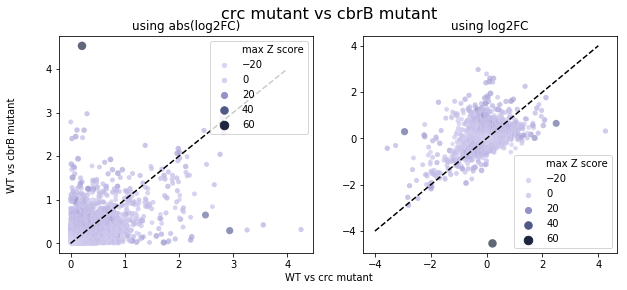

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)

fig_1v2_abs = sns.scatterplot(data=merged_1v2_1v3_df,
                              x="Test statistic (Real)_grp_1v2",
                              y="Test statistic (Real)_grp_1v3",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[0],
                              palette=cmap)
fig_1v2_abs.plot([0,4],[0,4],"--k")

fig_1v2_raw = sns.scatterplot(data=merged_1v2_1v3_df,
                              x="Test statistic (Real)_grp_1v2_raw",
                              y="Test statistic (Real)_grp_1v3_raw",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[1],
                              palette=cmap)
fig_1v2_raw.plot([-4,4],[-4,4],"--k")

# Add labels
fig.suptitle('crc mutant vs cbrB mutant', fontsize=16)
fig.text(0.5, 0.04, 'WT vs crc mutant', ha='center', va='center')
fig.text(0.06, 0.5, 'WT vs cbrB mutant', ha='center', va='center', rotation='vertical')
axes[0].set_title('using abs(log2FC)')
axes[1].set_title('using log2FC')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
print(fig)

# ADD NEWLINE TO TITLE
# MAKE LABELS LARGER
# MOVE LEGEND?

### 1v2 compared with 1v4

Figure(720x288)


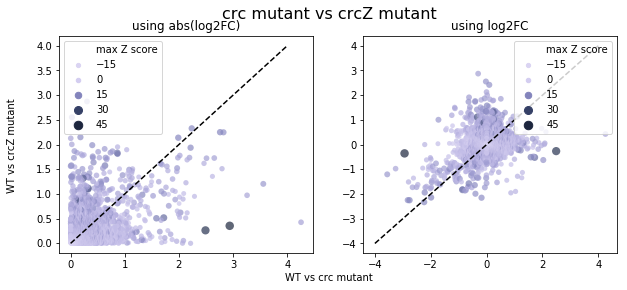

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)

fig_1v2_abs = sns.scatterplot(data=merged_1v2_1v4_df,
                              x="Test statistic (Real)_grp_1v2",
                              y="Test statistic (Real)_grp_1v4",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[0],
                              palette=cmap)
fig_1v2_abs.plot([0,4],[0,4],"--k")

fig_1v2_raw = sns.scatterplot(data=merged_1v2_1v4_df,
                              x="Test statistic (Real)_grp_1v2_raw",
                              y="Test statistic (Real)_grp_1v4_raw",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[1],
                              palette=cmap)
fig_1v2_raw.plot([-4,4],[-4,4],"--k")

# Add labels
fig.suptitle('crc mutant vs crcZ mutant', fontsize=16)
fig.text(0.5, 0.04, 'WT vs crc mutant', ha='center', va='center')
fig.text(0.06, 0.5, 'WT vs crcZ mutant', ha='center', va='center', rotation='vertical')
axes[0].set_title('using abs(log2FC)')
axes[1].set_title('using log2FC')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
print(fig)


### 1v3 compared with 1v4

Figure(720x288)


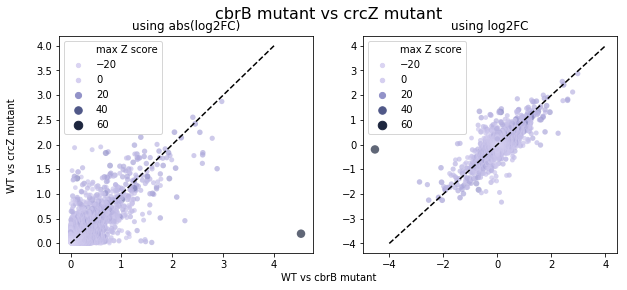

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)

fig_1v2_abs = sns.scatterplot(data=merged_1v3_1v4_df,
                              x="Test statistic (Real)_grp_1v3",
                              y="Test statistic (Real)_grp_1v4",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[0],
                              palette=cmap)
fig_1v2_abs.plot([0,4],[0,4],"--k")

fig_1v2_raw = sns.scatterplot(data=merged_1v3_1v4_df,
                              x="Test statistic (Real)_grp_1v3_raw",
                              y="Test statistic (Real)_grp_1v4_raw",
                              hue="max Z score",
                              size="max Z score",
                              linewidth=0,
                              alpha=0.7,
                              ax=axes[1],
                              palette=cmap)
fig_1v2_raw.plot([-4,4],[-4,4],"--k")

# Add labels
fig.suptitle('cbrB mutant vs crcZ mutant', fontsize=16)
fig.text(0.5, 0.04, 'WT vs cbrB mutant', ha='center', va='center')
fig.text(0.06, 0.5, 'WT vs crcZ mutant', ha='center', va='center', rotation='vertical')
axes[0].set_title('using abs(log2FC)')
axes[1].set_title('using log2FC')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
print(fig)


**Takeaway:**
* A few specific genes (with very high z-score) in the off x-y regions as expected. This shows some promise for using z-score to distinguish between generic and specific genes and we can start looking more into these trends.

ADD TEXT HERE

## DEGs found using traditional criteria and using z-score

When performing DE analysis, this can return hundreds of genes using traditional criteria (FDR adjusted p-value < 0.05 and log2 fold change > 2). We want to see what genes are selected when we add z-score as an additional criteria to indicate genes that are specific to the pertubagen in question.

### 1v2

In [14]:
# Get DEGs using traditional criteria
degs_1v2_traditional = list((merged_1v2s_df[(merged_1v2s_df['Test statistic (Real)_grp_1v2']>1)
                                           & (merged_1v2s_df['Adj P-value (Real)_grp_1v2']<0.05)]
                             .set_index('Gene ID')
                             .index)
                           )
print(f'No. of DEGs using traditional criteria: {len(degs_1v2_traditional)}')

# Get predicted specific DEGs using z-score cutoff
degs_1v2_specific = list((merged_1v2s_df[(merged_1v2s_df['Test statistic (Real)_grp_1v2']>1)
                                           & (merged_1v2s_df['Z score_grp_1v2']>10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of specific DEGs using z-score: {len(degs_1v2_specific)}')

# Get predicted generic DEGs using z-score cutoff
degs_1v2_generic = list((merged_1v2s_df[(merged_1v2s_df['Test statistic (Real)_grp_1v2']>1)
                                           & (merged_1v2s_df['Z score_grp_1v2']<10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of generic DEGs using z-score: {len(degs_1v2_generic)}')

# Get intersection of DEGs using traditional and z-score criteria
degs_1v2_intersect = list(set(degs_1v2_traditional).intersection(degs_1v2_specific))
print(f'No. of traditional DEGs that pass z-score criteria: {len(degs_1v2_intersect)}')

# Get specific DEGs that were NOT found using traditional criteria
degs_1v2_diff = list(set(degs_1v2_specific).difference(degs_1v2_intersect))
print(f'No. of specific DEGs that were not found by traditional criteria: {len(degs_1v2_diff)}')

No. of DEGs using traditional criteria: 93
No. of specific DEGs using z-score: 18
No. of generic DEGs using z-score: 147
No. of traditional DEGs that pass z-score criteria: 15
No. of specific DEGs that were not found by traditional criteria: 3


In [15]:
# Save list of genes that interesect and those that do not
merged_1v2s_df['Gene ID Name'] = merged_1v2s_df['Gene ID'] + " " + merged_1v2s_df['Gene Name_grp_1v2'].fillna("")

# Set `Gene ID` as index
merged_1v2s_df.set_index('Gene ID', inplace=True)

gene_id_names_1v2_intersect = merged_1v2s_df.loc[degs_1v2_intersect, 'Gene ID Name']
gene_id_names_1v2_diff = merged_1v2s_df.loc[degs_1v2_diff, 'Gene ID Name']
gene_id_names_1v2_generic = merged_1v2s_df.loc[degs_1v2_generic, 'Gene ID Name']

gene_lists_1v2_df = pd.DataFrame({'Traditional + specific DEGs': gene_id_names_1v2_intersect,
                                  'Specific only DEGs': gene_id_names_1v2_diff,
                                  'Generic DEGs': gene_id_names_1v2_generic
                                 }
                                )

Figure(1080x288)


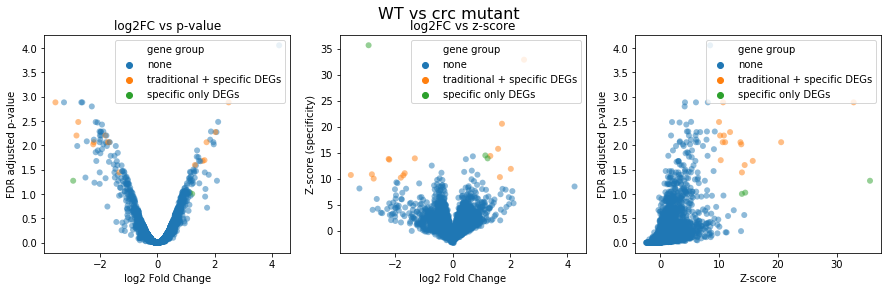

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

# Add columns for plotting
merged_1v2s_df['FDR adjuted p-value plot'] = -np.log10(merged_1v2s_df['Adj P-value (Real)_grp_1v2'])
merged_1v2s_df['gene group'] = 'none'
merged_1v2s_df.loc[degs_1v2_intersect, 'gene group'] = 'traditional + specific DEGs'
merged_1v2s_df.loc[degs_1v2_diff,'gene group'] = 'specific only DEGs'

# Plot: log2FC vs p-value (traditional criteria)
sns.scatterplot(data=merged_1v2s_df,
                x="Test statistic (Real)_grp_1v2_raw",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[0])

# Plot: log2FC vs z-score
sns.scatterplot(data=merged_1v2s_df,
                x="Test statistic (Real)_grp_1v2_raw",
                y="Z score_grp_1v2",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[1])

# Plot: z-score vs p-value
sns.scatterplot(data=merged_1v2s_df,
                x="Z score_grp_1v2",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[2])

# Add labels
fig.suptitle('WT vs crc mutant', fontsize=16)
axes[0].set_xlabel('log2 Fold Change')
axes[1].set_xlabel('log2 Fold Change')
axes[2].set_xlabel('Z-score')
axes[0].set_ylabel('FDR adjusted p-value')
axes[1].set_ylabel('Z-score (specificity)')
axes[2].set_ylabel('FDR adjusted p-value')
axes[0].set_title('log2FC vs p-value')
axes[1].set_title('log2FC vs z-score')
print(fig)

# ADD NEWLINE TO TITLE
# ADD THRESHOLD
# ADD P-VALUE VS Z-SCORE

### 1v3

In [17]:
# Get DEGs using traditional criteria
degs_1v3_traditional = list((merged_1v3s_df[(merged_1v3s_df['Test statistic (Real)_grp_1v3']>1)
                                           & (merged_1v3s_df['Adj P-value (Real)_grp_1v3']<0.05)]
                             .set_index('Gene ID')
                             .index)
                           )
print(f'No. of DEGs using traditional criteria: {len(degs_1v3_traditional)}')

# Get predicted specific DEGs using z-score cutoff
degs_1v3_specific = list((merged_1v3s_df[(merged_1v3s_df['Test statistic (Real)_grp_1v3']>1)
                                           & (merged_1v3s_df['Z score_grp_1v3']>10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of specific DEGs using z-score: {len(degs_1v2_specific)}')

# Get predicted generic DEGs using z-score cutoff
degs_1v3_generic = list((merged_1v3s_df[(merged_1v3s_df['Test statistic (Real)_grp_1v3']>1)
                                           & (merged_1v3s_df['Z score_grp_1v3']<10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of generic DEGs using z-score: {len(degs_1v3_generic)}')

# Get intersection of DEGs using traditional and z-score criteria
degs_1v3_intersect = list(set(degs_1v3_traditional).intersection(degs_1v3_specific))
print(f'No. of traditional DEGs that pass z-score criteria: {len(degs_1v3_intersect)}')

# Get specific DEGs that were NOT found using traditional criteria
degs_1v3_diff = list(set(degs_1v3_specific).difference(degs_1v3_intersect))
print(f'No. of specific DEGs that were not found by traditional criteria: {len(degs_1v3_diff)}')

No. of DEGs using traditional criteria: 146
No. of specific DEGs using z-score: 18
No. of generic DEGs using z-score: 119
No. of traditional DEGs that pass z-score criteria: 29
No. of specific DEGs that were not found by traditional criteria: 1


In [18]:
# Save list of genes that interesect and those that do not
merged_1v3s_df['Gene ID Name'] = merged_1v3s_df['Gene ID'] + " " + merged_1v3s_df['Gene Name_grp_1v3'].fillna("")

# Set `Gene ID` as index
merged_1v3s_df.set_index('Gene ID', inplace=True)

gene_id_names_1v3_intersect = merged_1v2s_df.loc[degs_1v3_intersect, 'Gene ID Name']
gene_id_names_1v3_diff = merged_1v2s_df.loc[degs_1v3_diff, 'Gene ID Name']
gene_id_names_1v3_generic = merged_1v2s_df.loc[degs_1v3_generic, 'Gene ID Name']

gene_lists_1v3_df = pd.DataFrame({'Traditional + specific DEGs': gene_id_names_1v3_intersect,
                                  'Specific only DEGs': gene_id_names_1v3_diff,
                                  'Generic DEGs': gene_id_names_1v3_generic
                                 }
                                )

Figure(1080x288)


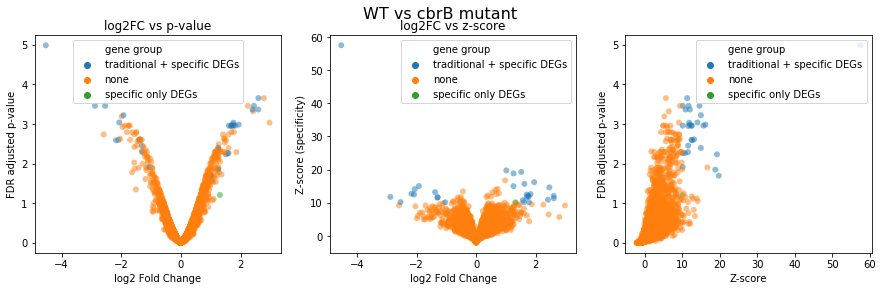

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

# Add columns for plotting
merged_1v3s_df['FDR adjuted p-value plot'] = -np.log10(merged_1v3s_df['Adj P-value (Real)_grp_1v3'])
merged_1v3s_df['gene group'] = 'none'
merged_1v3s_df.loc[degs_1v3_intersect, 'gene group'] = 'traditional + specific DEGs'
merged_1v3s_df.loc[degs_1v3_diff,'gene group'] = 'specific only DEGs'

# Plot: log2FC vs p-value (traditional criteria)
sns.scatterplot(data=merged_1v3s_df,
                x="Test statistic (Real)_grp_1v3_raw",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[0])

# Plot: log2FC vs z-score
sns.scatterplot(data=merged_1v3s_df,
                x="Test statistic (Real)_grp_1v3_raw",
                y="Z score_grp_1v3",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[1])

# Plot: z-score vs p-value
sns.scatterplot(data=merged_1v3s_df,
                x="Z score_grp_1v3",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[2])

# Add labels
fig.suptitle('WT vs cbrB mutant', fontsize=16)
axes[0].set_xlabel('log2 Fold Change')
axes[1].set_xlabel('log2 Fold Change')
axes[2].set_xlabel('Z-score')
axes[0].set_ylabel('FDR adjusted p-value')
axes[1].set_ylabel('Z-score (specificity)')
axes[2].set_ylabel('FDR adjusted p-value')
axes[0].set_title('log2FC vs p-value')
axes[1].set_title('log2FC vs z-score')
print(fig)

### 1v4

In [20]:
# Get DEGs using traditional criteria
degs_1v4_traditional = list((merged_1v4s_df[(merged_1v4s_df['Test statistic (Real)_grp_1v4']>1)
                                           & (merged_1v4s_df['Adj P-value (Real)_grp_1v4']<0.05)]
                             .set_index('Gene ID')
                             .index)
                           )
print(f'No. of DEGs using traditional criteria: {len(degs_1v4_traditional)}')

# Get predicted specific DEGs using z-score cutoff
degs_1v4_specific = list((merged_1v4s_df[(merged_1v4s_df['Test statistic (Real)_grp_1v4']>1)
                                           & (merged_1v4s_df['Z score_grp_1v4']>10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of specific DEGs using z-score: {len(degs_1v4_specific)}')

# Get predicted generic DEGs using z-score cutoff
degs_1v4_generic = list((merged_1v4s_df[(merged_1v4s_df['Test statistic (Real)_grp_1v4']>1)
                                           & (merged_1v4s_df['Z score_grp_1v4']<10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of generic DEGs using z-score: {len(degs_1v4_generic)}')

# Get intersection of DEGs using traditional and z-score criteria
degs_1v4_intersect = list(set(degs_1v4_traditional).intersection(degs_1v4_specific))
print(f'No. of traditional DEGs that pass z-score criteria: {len(degs_1v4_intersect)}')

# Get specific DEGs that were NOT found using traditional criteria
degs_1v4_diff = list(set(degs_1v4_specific).difference(degs_1v4_intersect))
print(f'No. of specific DEGs that were not found by traditional criteria: {len(degs_1v4_diff)}')

No. of DEGs using traditional criteria: 155
No. of specific DEGs using z-score: 43
No. of generic DEGs using z-score: 119
No. of traditional DEGs that pass z-score criteria: 43
No. of specific DEGs that were not found by traditional criteria: 0


In [21]:
# Save list of genes that interesect and those that do not
merged_1v4s_df['Gene ID Name'] = merged_1v4s_df['Gene ID'] + " " + merged_1v4s_df['Gene Name_grp_1v4'].fillna("")

# Set `Gene ID` as index
merged_1v4s_df.set_index('Gene ID', inplace=True)

gene_id_names_1v4_intersect = merged_1v4s_df.loc[degs_1v4_intersect, 'Gene ID Name']
gene_id_names_1v4_diff = merged_1v4s_df.loc[degs_1v4_diff, 'Gene ID Name']
gene_id_names_1v4_generic = merged_1v4s_df.loc[degs_1v4_generic, 'Gene ID Name']

gene_lists_1v4_df = pd.DataFrame({'Traditional + specific DEGs': gene_id_names_1v4_intersect,
                                  'Specific only DEGs': gene_id_names_1v4_diff,
                                  'Generic DEGs': gene_id_names_1v4_generic
                                 }
                                )

Figure(1080x288)


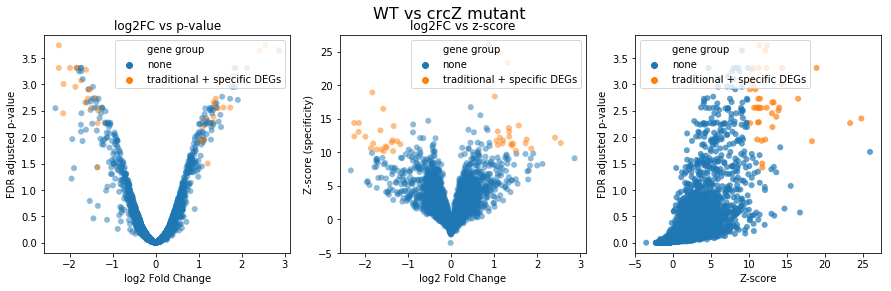

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

# Add columns for plotting
merged_1v4s_df['FDR adjuted p-value plot'] = -np.log10(merged_1v4s_df['Adj P-value (Real)_grp_1v4'])
merged_1v4s_df['gene group'] = 'none'
merged_1v4s_df.loc[degs_1v4_intersect, 'gene group'] = 'traditional + specific DEGs'
merged_1v4s_df.loc[degs_1v4_diff,'gene group'] = 'specific only DEGs'

# Plot: log2FC vs p-value (traditional criteria)
sns.scatterplot(data=merged_1v4s_df,
                x="Test statistic (Real)_grp_1v4_raw",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[0])

# Plot: log2FC vs z-score
sns.scatterplot(data=merged_1v4s_df,
                x="Test statistic (Real)_grp_1v4_raw",
                y="Z score_grp_1v4",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[1])

# Plot: z-score vs p-value
sns.scatterplot(data=merged_1v4s_df,
                x="Z score_grp_1v4",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.7,
                ax=axes[2])

# Add labels
fig.suptitle('WT vs crcZ mutant', fontsize=16)
axes[0].set_xlabel('log2 Fold Change')
axes[1].set_xlabel('log2 Fold Change')
axes[2].set_xlabel('Z-score')
axes[0].set_ylabel('FDR adjusted p-value')
axes[1].set_ylabel('Z-score (specificity)')
axes[2].set_ylabel('FDR adjusted p-value')
axes[0].set_title('log2FC vs p-value')
axes[1].set_title('log2FC vs z-score')
print(fig)

### 1v5

In [23]:
# Create merged df using grp_1v5_raw and grp-1v5
merged_1v5s_df = grp_1v5.merge(grp_1v5_raw, left_on='Gene ID', right_on="Gene ID", suffixes=["_grp_1v5", "_grp_1v5_raw"])

# Get DEGs using traditional criteria
degs_1v5_traditional = list((merged_1v5s_df[(merged_1v5s_df['Test statistic (Real)_grp_1v5']>1)
                                           & (merged_1v5s_df['Adj P-value (Real)_grp_1v5']<0.05)]
                             .set_index('Gene ID')
                             .index)
                           )
print(f'No. of DEGs using traditional criteria: {len(degs_1v5_traditional)}')

# Get predicted specific DEGs using z-score cutoff
degs_1v5_specific = list((merged_1v5s_df[(merged_1v5s_df['Test statistic (Real)_grp_1v5']>1)
                                           & (merged_1v5s_df['Z score_grp_1v5']>10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of specific DEGs using z-score: {len(degs_1v5_specific)}')

# Get predicted generic DEGs using z-score cutoff
degs_1v5_generic = list((merged_1v5s_df[(merged_1v5s_df['Test statistic (Real)_grp_1v5']>1)
                                           & (merged_1v5s_df['Z score_grp_1v5']<10)]
                          .set_index('Gene ID')
                          .index)
                           )
print(f'No. of generic DEGs using z-score: {len(degs_1v5_generic)}')

# Get intersection of DEGs using traditional and z-score criteria
degs_1v5_intersect = list(set(degs_1v5_traditional).intersection(degs_1v5_specific))
print(f'No. of traditional DEGs that pass z-score criteria: {len(degs_1v5_intersect)}')

# Get specific DEGs that were NOT found using traditional criteria
degs_1v5_diff = list(set(degs_1v5_specific).difference(degs_1v5_intersect))
print(f'No. of specific DEGs that were not found by traditional criteria: {len(degs_1v5_diff)}')

No. of DEGs using traditional criteria: 711
No. of specific DEGs using z-score: 3
No. of generic DEGs using z-score: 708
No. of traditional DEGs that pass z-score criteria: 3
No. of specific DEGs that were not found by traditional criteria: 0


In [24]:
# Save list of genes that interesect and those that do not
merged_1v5s_df['Gene ID Name'] = merged_1v5s_df['Gene ID'] + " " + merged_1v5s_df['Gene Name_grp_1v5'].fillna("")

# Set `Gene ID` as index
merged_1v5s_df.set_index('Gene ID', inplace=True)

gene_id_names_1v5_intersect = merged_1v5s_df.loc[degs_1v5_intersect, 'Gene ID Name']
gene_id_names_1v5_diff = merged_1v5s_df.loc[degs_1v5_diff, 'Gene ID Name']
gene_id_names_1v5_generic = merged_1v5s_df.loc[degs_1v5_generic, 'Gene ID Name']

gene_lists_1v5_df = pd.DataFrame({'Traditional + specific DEGs': gene_id_names_1v5_intersect,
                                  'Specific only DEGs': gene_id_names_1v5_diff,
                                  'Generic DEGs': gene_id_names_1v5_generic
                                 }
                                )

Figure(1080x288)


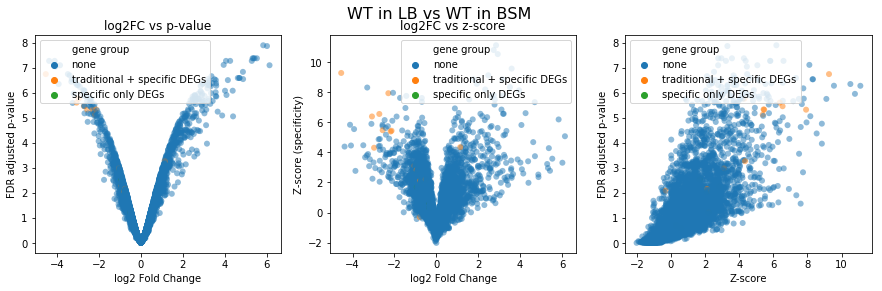

In [25]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,4))

# Add columns for plotting
merged_1v5s_df['FDR adjuted p-value plot'] = -np.log10(merged_1v5s_df['Adj P-value (Real)_grp_1v5'])
merged_1v5s_df['gene group'] = 'none'
merged_1v5s_df.loc[degs_1v2_intersect, 'gene group'] = 'traditional + specific DEGs'
merged_1v5s_df.loc[degs_1v2_diff,'gene group'] = 'specific only DEGs'

# Plot: log2FC vs p-value (traditional criteria)
sns.scatterplot(data=merged_1v5s_df,
                x="Test statistic (Real)_grp_1v5_raw",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[0])

# Plot: log2FC vs z-score
sns.scatterplot(data=merged_1v5s_df,
                x="Test statistic (Real)_grp_1v5_raw",
                y="Z score_grp_1v5",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[1])

# Plot: z-score vs p-value
sns.scatterplot(data=merged_1v5s_df,
                x="Z score_grp_1v5",
                y="FDR adjuted p-value plot",
                hue="gene group",
                linewidth=0,
                alpha=0.5,
                ax=axes[2])

# Add labels
fig.suptitle('WT in LB vs WT in BSM', fontsize=16)
axes[0].set_xlabel('log2 Fold Change')
axes[1].set_xlabel('log2 Fold Change')
axes[2].set_xlabel('Z-score')
axes[0].set_ylabel('FDR adjusted p-value')
axes[1].set_ylabel('Z-score (specificity)')
axes[2].set_ylabel('FDR adjusted p-value')
axes[0].set_title('log2FC vs p-value')
axes[1].set_title('log2FC vs z-score')
print(fig)

**Takeaway:**
* Overall it looks like we find on the order of hundreds of DEGs using the traditional criteria (p-value and log2 fold change), but if we filter by z-score we get a reduced set of genes
* We predict that this z-score cutoff will supply researchers with a reasonable sized list of DEGs to follow-up with and that these are the genes that are most relevant to the perturbagen in question.